In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
mask = h5py.File(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Masked_HRD_Data\Extracted_Folder\0001\A.mhdr.h5",'r')['hdr'][:]
hsi = h5py.File(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\HDR_Data\Extracted_Folder\0001\A.hdr.h5",'r')['hdr'][:]

In [51]:
m = scipy.io.loadmat(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Minerals_mat_files\0000_A_gt.mat")['MASK']
h = scipy.io.loadmat(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Minerals_mat_files\0000_A.mat")['HDR']
m.shape,h.shape

((320, 410), (256, 320, 410))

In [28]:
# hsi_raw = h5py.File(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Raw_Data\0000\0000\A.scan.h5",'r')
# hsi_raw.keys()


In [8]:
first_mean = np.mean(hsi[:85,:,:], axis=0)
second_mean = np.mean(hsi[85:170,:,:], axis=0)
remaining_mean = np.mean(hsi[170:,:,:], axis=0)

result = np.concatenate([first_mean[..., np.newaxis], second_mean[..., np.newaxis], remaining_mean[..., np.newaxis]], axis=-1)
result.shape

(320, 410, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\HSI Project\Updated_Work\HSI_Classification\venv\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


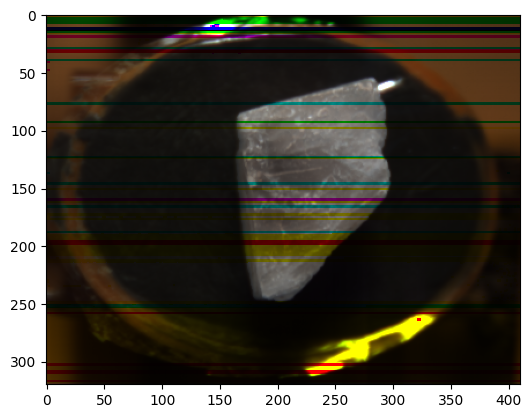

In [9]:
plt.imshow(result)
plt.show()

In [10]:
hsi.shape,mask.shape

((256, 320, 410), (256, 191, 137))

In [35]:
hsi = np.nan_to_num(hsi, nan=0)
mask = np.nan_to_num(mask, nan=0)

In [13]:
hsi.shape,mask.shape

((256, 320, 410), (256, 191, 137))

In [81]:
# hsi_1 = hsi[0,57:248,162:299]
hsi_1 = hsi[0]
hsi_1.shape

(320, 410)

In [85]:
# mask[0]


0.006585112

NameError: name 'hsi_1' is not defined

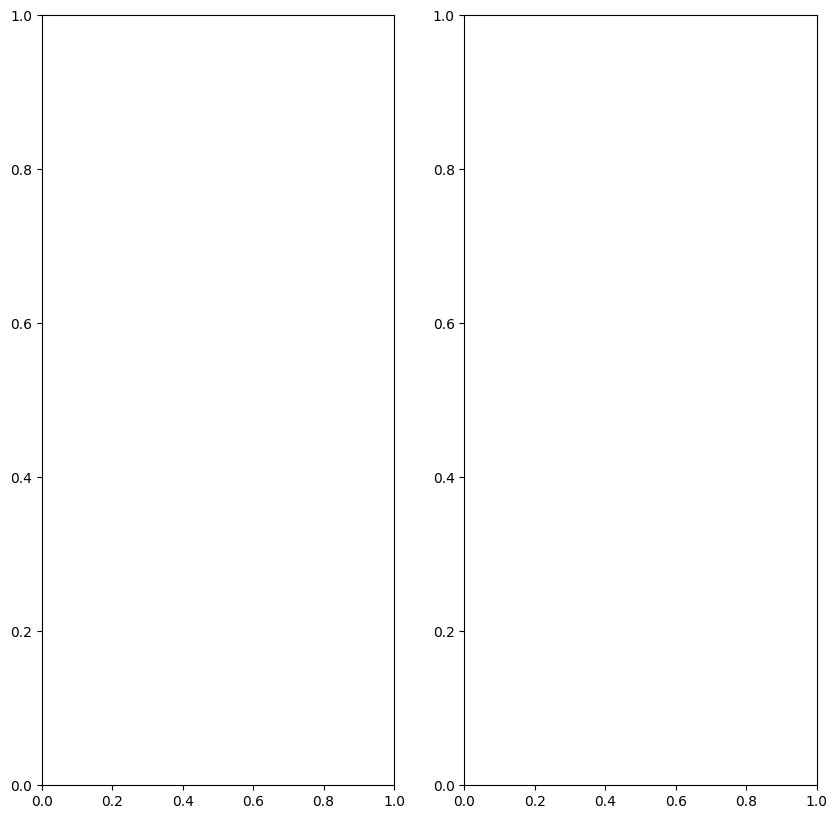

In [3]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(hsi_1)
ax[1].imshow(mask[0])
plt.show()

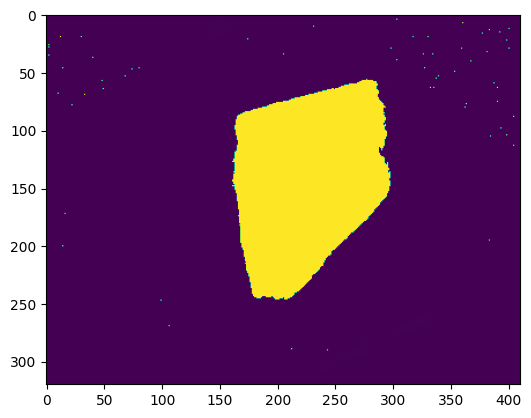

In [87]:
hsi_temp = hsi_1.copy()
for i in range(mask[0].shape[0]):
    for j in range(mask[0].shape[1]):
        val = mask[0,i,j]
        if (val>0):
            mask_temp = (hsi_temp==val)
            hsi_temp[mask_temp] = 255
plt.imshow(hsi_temp)
plt.show()

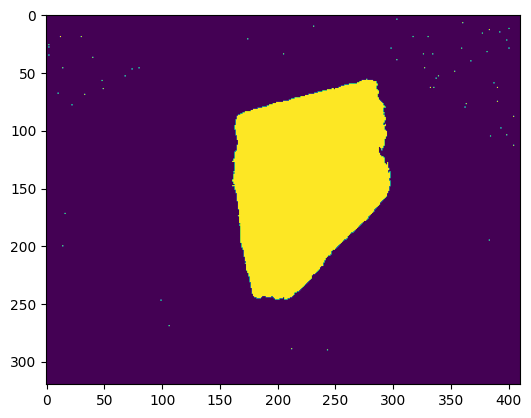

In [94]:
hsi_temp = np.where((hsi_temp>0)&(hsi_temp<255),0,hsi_temp)
plt.imshow(hsi_temp)
plt.show()

In [98]:
hsi_temp = hsi_temp.astype(np.uint8)

[]

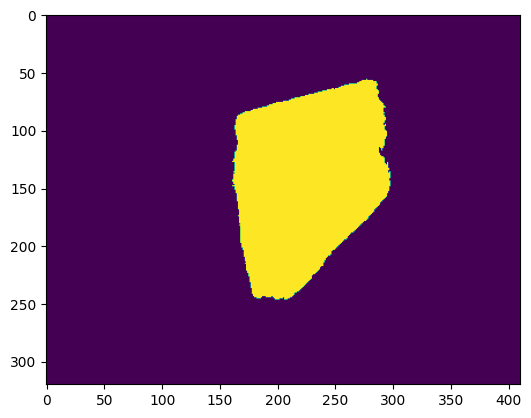

In [99]:
import cv2
# Perform connected component analysis (CCA) to label connected components
num_labels, labeled_image = cv2.connectedComponents(hsi_temp)

# Compute the size of each connected component
sizes = np.bincount(labeled_image.flatten())

# Define a threshold to filter out small objects
threshold_size = 5  # Adjust this threshold as needed

# Create a mask to retain only pixels corresponding to larger objects
new_mask = np.zeros_like(labeled_image)
for label, size in enumerate(sizes):
    if size >= threshold_size and label != 0:  # Exclude background label (0)
        new_mask[labeled_image == label] = 255
plt.imshow(new_mask)
plt.plot()


In [4]:
def generate_binary_mask(hsi_data,mask_data):
    hsi_data = np.nan_to_num(hsi_data, nan=0)
    hsi_temp = hsi_data[0].copy() ## Selecting first channel
    mask_data = np.nan_to_num(mask_data, nan=0)
    mask = mask_data[0].copy() ## Selecting first channel
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            val = mask[i,j]
            if (val>0):
                mask_temp = (hsi_temp==val)
                hsi_temp[mask_temp] = 255
    hsi_temp = np.where((hsi_temp>0)&(hsi_temp<255),0,hsi_temp)
    
    hsi_temp = hsi_temp.astype(np.uint8)
    num_labels, labeled_image = cv2.connectedComponents(hsi_temp)
    sizes = np.bincount(labeled_image.flatten())
    threshold_size = 20
    new_mask = np.zeros_like(labeled_image)
    for label, size in enumerate(sizes):
        if size >= threshold_size and label != 0:  # Exclude background label (0)
            new_mask[labeled_image == label] = 255            
    return new_mask

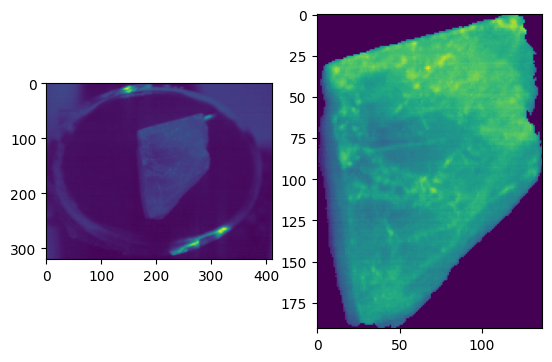

In [6]:
id = "0001"   
maskpath = f"D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Masked_HRD_Data\\Extracted_Folder\\{id}\\A.mhdr.h5"
hsipath = f"D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\HDR_Data\\Extracted_Folder\\{id}\\A.hdr.h5"
mask = h5py.File(maskpath,'r')['hdr'][:]
hsi = h5py.File(hsipath,'r')['hdr'][:]
mask = np.nan_to_num(mask, nan=0)
fig,ax = plt.subplots(1,2)
ax[0].imshow(hsi[0])
ax[1].imshow(mask[0])
plt.show()

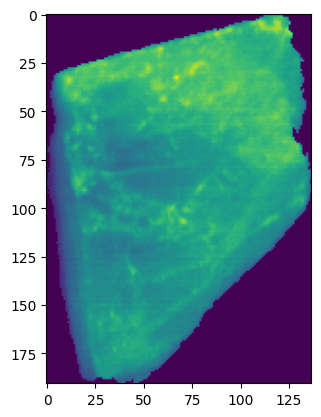

In [12]:
plt.imshow(mask[0])
plt.show()

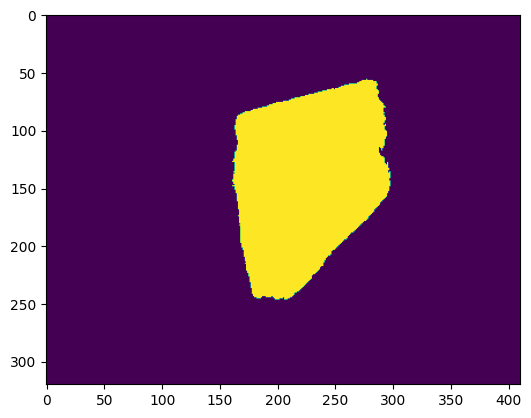

In [10]:
import cv2
new_mask = generate_binary_mask(hsi,mask)
plt.imshow(new_mask)
plt.show()

In [ ]:
m = "D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Minerals_mat_files\0000_A.mat"


In [40]:
from tqdm import tqdm  
import cv2
progress_bar = tqdm(range(130,131))
for i in progress_bar:
    # Convert the index to a 4-digit string with leading zeros
    id = f"{i:04d}"   
    maskpath = f"D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Masked_HRD_Data\\Extracted_Folder\\{id}\\A.mhdr.h5"
    hsipath = f"D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\HDR_Data\\Extracted_Folder\\{id}\\A.hdr.h5"
    try:
        mask = h5py.File(maskpath,'r')['hdr'][:]
        hsi = h5py.File(hsipath,'r')['hdr'][:]
        new_mask = generate_binary_mask(hsi,mask)
        fig,ax = plt.subplots(1,2,figsize=(5,2))
        ax[0].imshow(new_mask)
        ax[0].set_title(f"Binary Mask for ID {id}")
        ax[1].imshow(hsi[0])
        plt.show()
        # Update tqdm progress bar
        progress_bar.update(0)
        progress_bar.set_postfix(ID=id)
        
    except FileNotFoundError:
        # If the file doesn't exist, continue to the next iteration
        continue

100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


In [78]:
hsi_1.min(),hsi_1.max()

(0.012091449, 1.2111975)

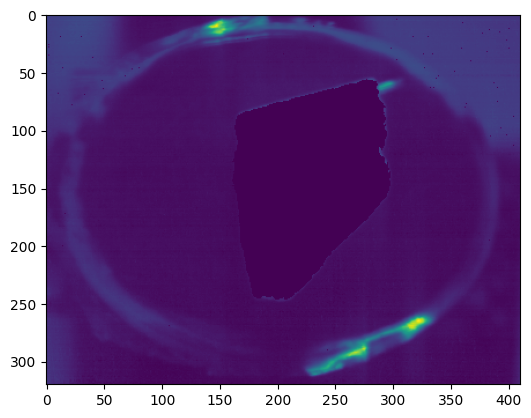

In [86]:
hsi_temp = hsi_1.copy()
for i in range(mask[0].shape[0]):
    for j in range(mask[0].shape[1]):
        val = mask[0,i,j]
        m = (hsi_temp==val)
        hsi_temp[m] = 0
plt.imshow(hsi_temp)
plt.show()

In [79]:
hsi_1[51:75,20:40]

array([[0.3381826 , 0.3624123 , 0.40089914, 0.4196644 , 0.43097135,
        0.4099505 , 0.35650933, 0.36135796, 0.36299124, 0.37751147,
        0.38638964, 0.38244492, 0.37441394, 0.38305977, 0.38068914,
        0.3725463 , 0.3699672 , 0.3708895 , 0.36263263, 0.37058163],
       [0.333535  , 0.35481793, 0.4365978 , 0.44591185, 0.47983503,
        0.44526306, 0.3835141 , 0.37572935, 0.35079917, 0.3735825 ,
        0.37294522, 0.37282443, 0.3699878 , 0.3761033 , 0.37332278,
        0.35620707, 0.36184204, 0.3544118 , 0.3575513 , 0.37704158],
       [0.33628163, 0.3383419 , 0.39152014, 0.45008907, 0.45356497,
        0.42841035, 0.36135072, 0.36555776, 0.34404033, 0.3319641 ,
        0.3327756 , 0.34150845, 0.3281984 , 0.33477834, 0.33446282,
        0.34748107, 0.34849128, 0.3541012 , 0.34627604, 0.34602708],
       [0.3449886 , 0.33640918, 0.35461062, 0.42152178, 0.40919742,
        0.37750947, 0.32672393, 0.34677178, 0.32691428, 0.31076628,
        0.31676084, 0.32930642, 0.31603867, 0

In [69]:
# np.where(hsi_1[50:75,20:40]==0.3381826)[0]

In [80]:
mask[0,50:75,20:40]

array([[0.36945668, 0.3707643 , 0.37195706, 0.39407736, 0.4168641 ,
        0.40591353, 0.35473892, 0.35318843, 0.36016238, 0.37386835,
        0.37171322, 0.36725643, 0.36873886, 0.384117  , 0.39483777,
        0.39490017, 0.38681793, 0.3922799 , 0.3800121 , 0.38136733],
       [0.35652238, 0.36585853, 0.37517604, 0.40376955, 0.41113383,
        0.40422136, 0.37098795, 0.36352953, 0.37882435, 0.38739386,
        0.39772013, 0.3925467 , 0.37699962, 0.38540116, 0.39517933,
        0.38887116, 0.38448253, 0.3799124 , 0.38751915, 0.35997936],
       [0.34007913, 0.3381826 , 0.3624123 , 0.40089914, 0.4196644 ,
        0.43097135, 0.4099505 , 0.35650933, 0.36135796, 0.36299124,
        0.37751147, 0.38638964, 0.38244492, 0.37441394, 0.38305977,
        0.38068914, 0.3725463 , 0.3699672 , 0.3708895 , 0.36263263],
       [0.34163824, 0.333535  , 0.35481793, 0.4365978 , 0.44591185,
        0.47983503, 0.44526306, 0.3835141 , 0.37572935, 0.35079917,
        0.3735825 , 0.37294522, 0.37282443, 0

[]

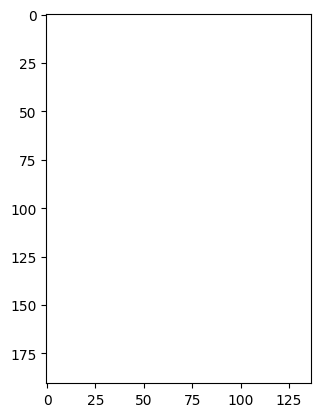

In [56]:
plt.imshow(hsi_1==mask[0],cmap='binary')
plt.plot()

(201, 138)

In [22]:
mask[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [15]:
# import trimesh

# # Load the mesh from the .PLY file using trimesh.load_mesh
# mesh = trimesh.load_mesh('D:/HSI Project/Updated_Work/HSI_Classification/Minerals_Dataset/HDR_Data/0000/0000/0000-A.ply')

# # Create a Trimesh object from the loaded mesh
# trimesh_object = trimesh.Trimesh(vertices=mesh.vertices, faces=mesh.faces)

# # Visualize the mesh
# trimesh_object.show()

In [16]:
# import xml.etree.ElementTree as ET

# # Parse the XML file
# tree = ET.parse(r"C:\Users\Use Me\Downloads\envi_template.xml")
# root = tree.getroot()

# # Print the root element tag
# print("Root element tag:", root.tag)

# # Iterate over child elements
# for child in root:
#     print("Element tag:", child.tag)
#     print("Element text:", child.text)